<font size=6>Support Vector Machines</font><br>
<font size=5>Autor: <font color="#2890f9"> William Mendez <br></font>
<font size=3>GitHub: <font color="#A371F7"> @WilliamMendez <br></font>
<font size=3>Cuenta uniandes: <font color="#FFF200"> w.mendez</font>

Importamos las librerias necesarias

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
import seaborn as sns

In [56]:
pd.set_option('display.max_columns', None) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar

Cargamos los datos y los revisamos

In [57]:
data = pd.read_csv('data/datos_convertidos.csv')

In [58]:
data.head()

,Index,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,0,26.50,0,0,0,0,0,0,1,60,0,0,1,3,8.0,0,0,0,0
1,1,28.75,0,0,0,0,2,0,1,55,0,0,1,3,7.0,0,0,0,0
2,2,19.90,1,0,0,0,1,0,1,65,0,0,1,2,7.0,0,0,0,0
3,3,28.06,0,0,0,1,1,0,0,65,0,1,1,2,8.0,0,0,0,0
4,4,29.29,1,0,0,0,1,0,0,70,0,0,1,3,7.0,1,0,0,0


In [59]:
data.describe()

,Index,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
count,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.00000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000
mean,33783.843779,28.300153,0.437163,0.067540,0.076042,3.430666,3.941559,0.139558,0.535346,64.663510,0.71665,0.225038,0.776530,2.609901,7.102267,0.132624,0.037092,0.094337,0.086094
std,19500.423273,6.211283,0.496040,0.250958,0.265067,8.100786,8.117292,0.346530,0.574922,7.464508,1.45877,0.510276,0.416574,1.025881,1.408602,0.339171,0.188988,0.292299,0.280506
min,0.000000,12.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16885.250000,24.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.00000,0.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,33829.500000,27.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,0.00000,0.000000,1.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000
75%,50690.750000,31.190000,1.000000,0.000000,0.000000,2.000000,3.000000,0.000000,1.000000,65.000000,1.00000,0.000000,1.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000
max,67499.000000,86.800000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,2.000000,80.000000,5.00000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
data.dtypes

Index                 int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth        int64
MentalHealth          int64
DiffWalking           int64
Sex                   int64
AgeCategory           int64
Race                  int64
Diabetic              int64
PhysicalActivity      int64
GenHealth             int64
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
HeartDisease          int64
dtype: object

In [61]:
data.isnull().mean()

Index               0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
HeartDisease        0.0
dtype: float64

Como los datos ya fueron preprocesados podemos empezar con el analisis para implementar el modelo de SVM

<AxesSubplot:title={'center':'# personas que han reportado CHD o MI'}, xlabel='HeartDisease', ylabel='count'>

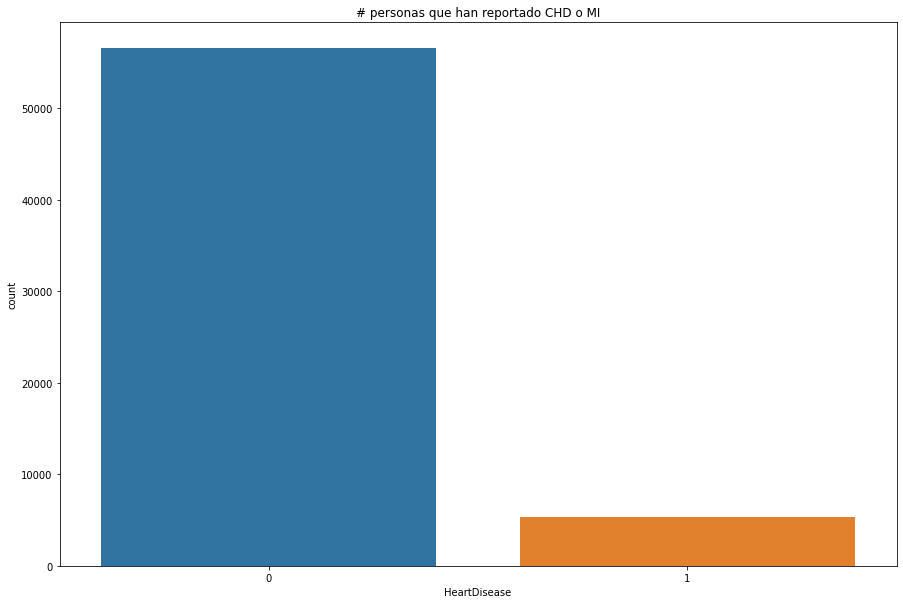

In [66]:
fig = plt.figure(figsize=(15, 10))
plt.title('# personas que han reportado CHD o MI')
sns.countplot(x='HeartDisease', data=data)
